In [ ]:
!pip install langchain-community
!pip install --upgrade langchain
!pip install -U langchain-ollama

In [ ]:
file_path = "/content/drive/MyDrive/AIPM/cleaned_data.csv"
# Load the cleaned data
df = pd.read_csv(file_path)
print("Data loaded successfully. Here's a preview:")
print(df.head())

Data loaded successfully. Here's a preview:
   timestamp  activityID  heart_rate    hand_1    hand_2    hand_3    hand_4  \
0      31.20          24         NaN -2.456255 -1.547849 -0.447012  0.459854   
1      31.21          24         NaN -2.456255 -1.549445 -0.453384  0.421375   
2      31.22          24       139.0 -2.456255 -1.553946 -0.434491  0.478935   
3      31.23          24       139.0 -2.456255 -1.559843 -0.425046  0.504459   
4      31.24          24       139.0 -2.456255 -1.565840 -0.406319  0.523500   

     hand_5    hand_6    hand_7  ...   ankle_8   ankle_9  ankle_10  ankle_11  \
0 -1.531335 -0.454720  0.434035  ... -0.066828 -0.048846 -0.136917 -0.805473   
1 -1.542180 -0.447283  0.465369  ... -0.127247 -0.020308  0.031372 -0.751382   
2 -1.550492 -0.448481  0.483675  ... -0.170201  0.045939  0.217533 -0.844931   
3 -1.552860 -0.437380  0.509757  ... -0.147196  0.101257  0.327859 -0.789253   
4 -1.563918 -0.429955  0.517574  ...  0.062736  0.055250  0.399153 -0.86415

Data loaded successfully. Here's a preview:
   timestamp  activityID  heart_rate    hand_1    hand_2    hand_3    hand_4  \
0      31.20          24         NaN -2.456255 -1.547849 -0.447012  0.459854   
1      31.21          24         NaN -2.456255 -1.549445 -0.453384  0.421375   
2      31.22          24       139.0 -2.456255 -1.553946 -0.434491  0.478935   
3      31.23          24       139.0 -2.456255 -1.559843 -0.425046  0.504459   
4      31.24          24       139.0 -2.456255 -1.565840 -0.406319  0.523500   

     hand_5    hand_6    hand_7  ...   ankle_8   ankle_9  ankle_10  ankle_11  \
0 -1.531335 -0.454720  0.434035  ... -0.066828 -0.048846 -0.136917 -0.805473   
1 -1.542180 -0.447283  0.465369  ... -0.127247 -0.020308  0.031372 -0.751382   
2 -1.550492 -0.448481  0.483675  ... -0.170201  0.045939  0.217533 -0.844931   
3 -1.552860 -0.437380  0.509757  ... -0.147196  0.101257  0.327859 -0.789253   
4 -1.563918 -0.429955  0.517574  ...  0.062736  0.055250  0.399153 -0.86415

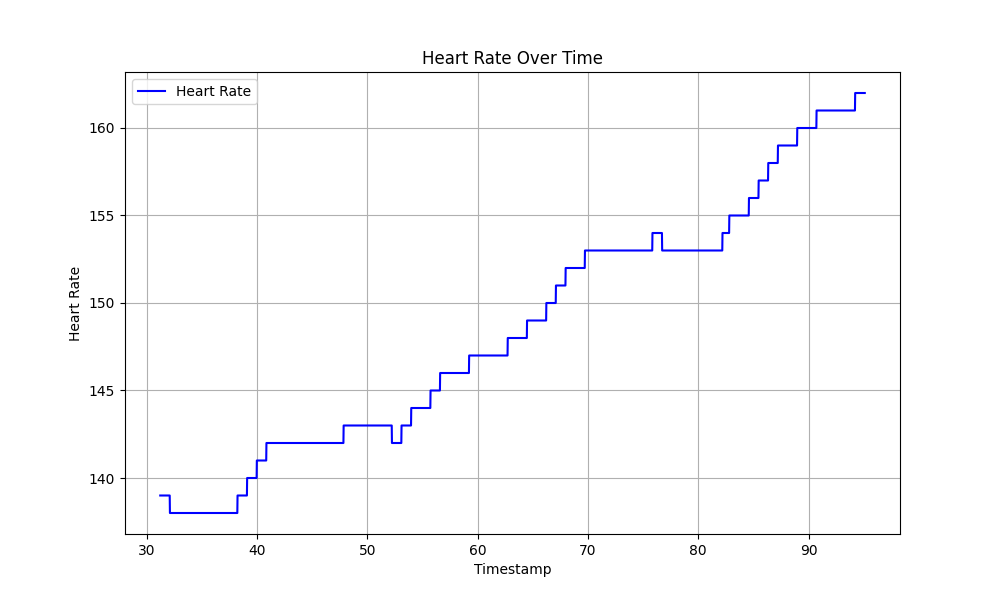

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# Updated import: Use the updated OllamaLLM from the new package
from langchain_ollama import OllamaLLM

# Create an instance of the LLM
llm = OllamaLLM(model="tinyllama")

# Step 1: Load the cleaned data from Google Drive
file_path = "/content/drive/MyDrive/AIPM/cleaned_data.csv"
df = pd.read_csv(file_path)
print("Data loaded successfully. Here's a preview:")
print(df.head())

# Define a load_data function for modularity
def load_data(file_path):
    return pd.read_csv(file_path)

# Step 2: Autolabel the data using the LLM via OllamaLLM
def autolabel_data(df):
    """Autolabel data based on sensor readings."""
    # Convert the DataFrame into JSON format (you might choose a subset for brevity)
    data_json = df.to_json(orient='split')
    # Construct the prompt (here, you might choose to summarize the data if it's too large)
    prompt = f"Label this dataset based on sensor readings:\n{data_json[:1000]}..."

    try:
        # Use the updated method: invoke instead of predict
        response = llm.invoke(messages=[{"role": "user", "content": prompt}])
        # Extract the labeled data from the response. Adjust based on the actual response structure.
        labeled_data = response['choices'][0]['message']['content'].strip()
    except Exception as e:
        print("Error connecting to OllamaLLM. Using dummy label. Error:", e)
        labeled_data = "Dummy label: Unknown activity"

    return labeled_data

# Step 3: Plot the data
def plot_data(df):
    """Generate a graph from the data (customize based on your dataset)."""
    plt.figure(figsize=(10, 6))
    # Check if required columns exist; adjust as needed.
    if 'timestamp' in df.columns and 'heart_rate' in df.columns:
        plt.plot(df['timestamp'], df['heart_rate'], label='Heart Rate', color='blue')
        plt.xlabel('Timestamp')
        plt.ylabel('Heart Rate')
        plt.title('Heart Rate Over Time')
        plt.legend()
        plt.grid(True)
    else:
        plt.text(0.5, 0.5, 'Required columns not found', fontsize=18, ha='center')

    # Save the graph as an image
    graph_filename = 'graph.png'
    plt.savefig(graph_filename)
    plt.close()  # Close the plot to free up resources
    return graph_filename

# Step 4: Putting everything together
def process_data_and_generate_graph(file_path="/content/drive/MyDrive/AIPM/cleaned_data.csv"):
    """Load the data, perform auto-labeling, and generate the graph."""
    df = load_data(file_path)
    labeled_data = autolabel_data(df)
    graph_filename = plot_data(df)
    return labeled_data, graph_filename

# Step 5: Run the process and display the results
if __name__ == "__main__":
    labeled_data, graph_filename = process_data_and_generate_graph()  # Uses the default absolute path
    print("Labeled Data:")
    print(labeled_data)

    # Display the graph image (if running in an interactive environment like Colab)
    from IPython.display import Image, display
    display(Image(graph_filename))

Data loaded successfully. Here's a preview:
   timestamp  activityID  heart_rate    hand_1    hand_2    hand_3    hand_4  \
0      31.20          24         NaN -2.456255 -1.547849 -0.447012  0.459854   
1      31.21          24         NaN -2.456255 -1.549445 -0.453384  0.421375   
2      31.22          24       139.0 -2.456255 -1.553946 -0.434491  0.478935   
3      31.23          24       139.0 -2.456255 -1.559843 -0.425046  0.504459   
4      31.24          24       139.0 -2.456255 -1.565840 -0.406319  0.523500   

     hand_5    hand_6    hand_7  ...   ankle_8   ankle_9  ankle_10  ankle_11  \
0 -1.531335 -0.454720  0.434035  ... -0.066828 -0.048846 -0.136917 -0.805473   
1 -1.542180 -0.447283  0.465369  ... -0.127247 -0.020308  0.031372 -0.751382   
2 -1.550492 -0.448481  0.483675  ... -0.170201  0.045939  0.217533 -0.844931   
3 -1.552860 -0.437380  0.509757  ... -0.147196  0.101257  0.327859 -0.789253   
4 -1.563918 -0.429955  0.517574  ...  0.062736  0.055250  0.399153 -0.86415

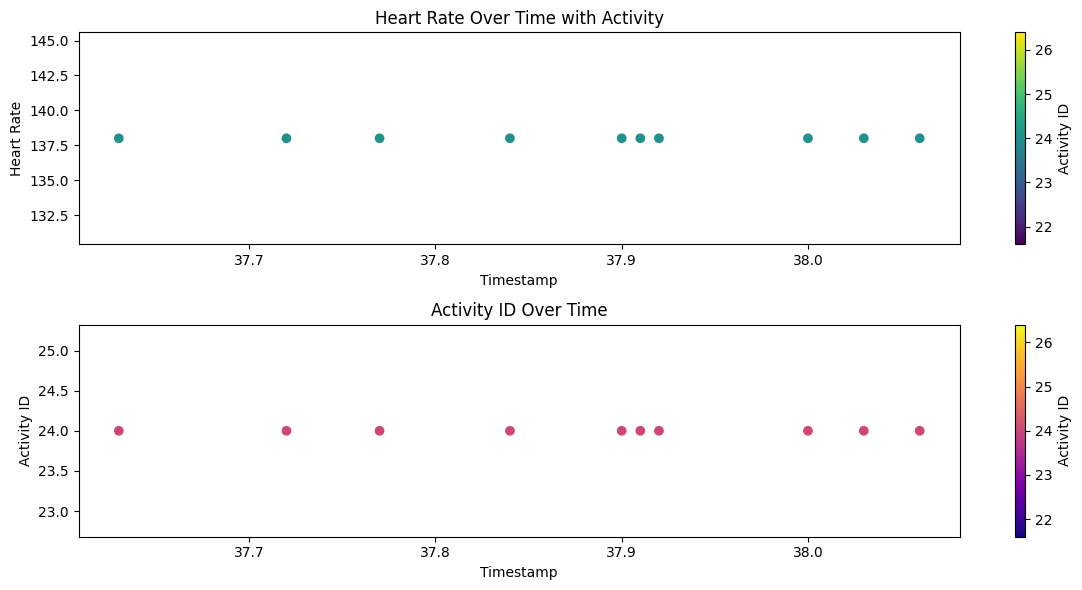

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# Updated import: Use OllamaLLM from the new package
from langchain_ollama import OllamaLLM

# Load dataset using the absolute file path from your Google Drive
file_path = "/content/drive/MyDrive/AIPM/cleaned_data.csv"
df = pd.read_csv(file_path)
print("Data loaded successfully. Here's a preview:")
print(df.head())

# Example timestamp range (modify as needed)
timestamp_start = 37.6
timestamp_end = 38.1

# Filter data by timestamp range
filtered_df = df[(df['timestamp'] >= timestamp_start) & (df['timestamp'] <= timestamp_end)]

# Sample a smaller subset to speed up processing
sampled_df = filtered_df.sample(n=min(10, len(filtered_df)), random_state=42)

# Initialize TinyLlama via OllamaLLM
llm = OllamaLLM(model="tinyllama")

# Mapping activity IDs to meaningful labels (if needed later)
activity_labels = {
    1: "Lying", 2: "Sitting", 3: "Standing", 4: "Walking", 5: "Running",
    6: "Cycling", 7: "Nordic Walking", 9: "Watching TV", 10: "Computer Work",
    11: "Car Driving", 12: "Ascending Stairs", 13: "Descending Stairs", 16: "Vacuum Cleaning",
    17: "Ironing", 18: "Folding Laundry", 19: "House Cleaning", 20: "Playing Soccer",
    24: "Rope Jumping", 0: "Other (Transient Activities)"
}

# Look at 5 previous and 5 next timestamps for context (sliding window approach)
window_size = 5
def label_data_with_context(idx, df):
    # Select a sliding window of rows around the index
    subset = df.iloc[max(0, idx - window_size): min(len(df), idx + window_size)]
    prompt = (
        f"Analyze the trend in the following time-series data:\n"
        f"{subset.to_dict(orient='records')}\n"
        f"Assign a consistent label based on activity patterns. Return only the label."
    )
    try:
        # Use the updated API call: pass prompt directly as input
        response = llm.invoke(prompt)
        # Handle the response: if it's a dict with choices, extract the label; otherwise, treat as a string
        if isinstance(response, dict) and 'choices' in response:
            label = response['choices'][0]['message']['content'].strip()
        else:
            label = response.strip()
        return label
    except Exception as e:
        print(f"Error labeling index {idx}: {e}")
        return "Dummy label"

# Apply labeling to the sampled data using the sliding window context
sampled_df["label"] = [label_data_with_context(i, sampled_df) for i in range(len(sampled_df))]

# Visualization
plt.figure(figsize=(12, 6))

# Determine which heart rate column exists
hr_col = 'heart_rate' if 'heart_rate' in sampled_df.columns else 'heartrate'

plt.subplot(2, 1, 1)
plt.scatter(sampled_df["timestamp"], sampled_df[hr_col], c=sampled_df["activityID"], cmap='viridis')
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Over Time with Activity")
plt.colorbar(label="Activity ID")

plt.subplot(2, 1, 2)
plt.scatter(sampled_df["timestamp"], sampled_df["activityID"], c=sampled_df["activityID"], cmap='plasma')
plt.xlabel("Timestamp")
plt.ylabel("Activity ID")
plt.title("Activity ID Over Time")
plt.colorbar(label="Activity ID")

plt.tight_layout()
plt.show()

Data loaded successfully. Here's a preview:
   timestamp  activityID  heart_rate    hand_1    hand_2    hand_3    hand_4  \
0      31.20          24         NaN -2.456255 -1.547849 -0.447012  0.459854   
1      31.21          24         NaN -2.456255 -1.549445 -0.453384  0.421375   
2      31.22          24       139.0 -2.456255 -1.553946 -0.434491  0.478935   
3      31.23          24       139.0 -2.456255 -1.559843 -0.425046  0.504459   
4      31.24          24       139.0 -2.456255 -1.565840 -0.406319  0.523500   

     hand_5    hand_6    hand_7  ...   ankle_8   ankle_9  ankle_10  ankle_11  \
0 -1.531335 -0.454720  0.434035  ... -0.066828 -0.048846 -0.136917 -0.805473   
1 -1.542180 -0.447283  0.465369  ... -0.127247 -0.020308  0.031372 -0.751382   
2 -1.550492 -0.448481  0.483675  ... -0.170201  0.045939  0.217533 -0.844931   
3 -1.552860 -0.437380  0.509757  ... -0.147196  0.101257  0.327859 -0.789253   
4 -1.563918 -0.429955  0.517574  ...  0.062736  0.055250  0.399153 -0.86415

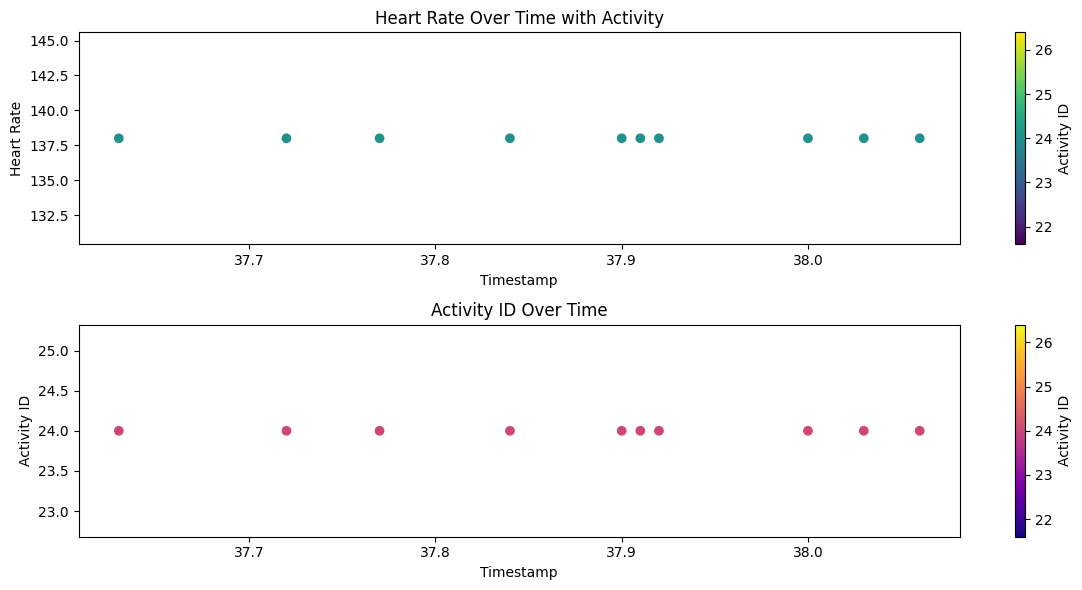


Labels from AutoGen:
['AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X']

Labels from LangGraph:
['LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y']

Labels from LlamaIndex:
['LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z']

Label

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# Updated import: Use OllamaLLM from the new package
from langchain_ollama import OllamaLLM

# ----- Data Loading -----
# Set the absolute file path for your cleaned_data.csv file on Google Drive
file_path = "/content/drive/MyDrive/AIPM/cleaned_data.csv"
df = pd.read_csv(file_path)
print("Data loaded successfully. Here's a preview:")
print(df.head())

# Example timestamp range (modify as needed)
timestamp_start = 37.6
timestamp_end = 38.1

# Filter data by timestamp range and sample a smaller subset
filtered_df = df[(df['timestamp'] >= timestamp_start) & (df['timestamp'] <= timestamp_end)]
sampled_df = filtered_df.sample(n=min(10, len(filtered_df)), random_state=42)

# ----- Define a Common Agent Interface -----
class BaseAgent:
    def auto_label(self, prompt: str) -> str:
        """Auto label using the provided prompt."""
        raise NotImplementedError("Subclasses must implement this method.")

# ----- Dummy Agent Implementations -----
class AutoGenAgent(BaseAgent):
    def __init__(self):
        # Replace with actual AutoGen initialization if available
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        # Dummy response; replace with actual call for AutoGen
        return "AutoGen label: Activity X"

class LangGraphAgent(BaseAgent):
    def __init__(self):
        # Replace with actual LangGraph initialization if available
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        return "LangGraph label: Activity Y"

class LlamaIndexAgent(BaseAgent):
    def __init__(self):
        # Replace with actual LlamaIndex initialization if available
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        return "LlamaIndex label: Activity Z"

class LangChainAgent(BaseAgent):
    def __init__(self):
        # Replace with actual LangChain agent initialization if available
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        return "LangChain label: Activity W"

# ----- Function to Create a Prompt from a Sliding Window -----
window_size = 5
def create_prompt(df_window):
    return (
        f"Analyze the trend in the following time-series data:\n"
        f"{df_window.to_dict(orient='records')}\n"
        "Assign a consistent label based on activity patterns. Return only the label."
    )

def label_data_with_context(idx, df, agent: BaseAgent):
    subset = df.iloc[max(0, idx - window_size): min(len(df), idx + window_size)]
    prompt = create_prompt(subset)
    try:
        # Use the updated API call: pass prompt directly as input
        # (For dummy agents, we just call their auto_label method.)
        label = agent.auto_label(prompt).strip()
        return label
    except Exception as e:
        print(f"Error labeling index {idx}: {e}")
        return "Dummy label"

# ----- Instantiate All Four Agents -----
agents = {
    "AutoGen": AutoGenAgent(),
    "LangGraph": LangGraphAgent(),
    "LlamaIndex": LlamaIndexAgent(),
    "LangChain": LangChainAgent()
}

# ----- Apply Labeling with All Agents and Collect Results -----
# For each agent, we label each row in the sampled_df using a sliding window context.
results = {}
for agent_name, agent in agents.items():
    print(f"Processing labels with {agent_name}...")
    labels = [label_data_with_context(i, sampled_df, agent) for i in range(len(sampled_df))]
    results[agent_name] = labels

# Option: Add one of the agent's labels to the sampled_df for visualization.
# Here, we use AutoGen's labels as an example.
sampled_df["label"] = results["AutoGen"]

# ----- Visualization -----
plt.figure(figsize=(12, 6))
# Determine correct heart rate column (assuming "heart_rate" or "heartrate")
hr_col = 'heart_rate' if 'heart_rate' in sampled_df.columns else 'heartrate'

plt.subplot(2, 1, 1)
plt.scatter(sampled_df["timestamp"], sampled_df[hr_col], c=sampled_df["activityID"], cmap='viridis')
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Over Time with Activity")
plt.colorbar(label="Activity ID")

plt.subplot(2, 1, 2)
plt.scatter(sampled_df["timestamp"], sampled_df["activityID"], c=sampled_df["activityID"], cmap='plasma')
plt.xlabel("Timestamp")
plt.ylabel("Activity ID")
plt.title("Activity ID Over Time")
plt.colorbar(label="Activity ID")

plt.tight_layout()
plt.show()

# Print out labeling results from each agent
for name, labels in results.items():
    print(f"\nLabels from {name}:")
    print(labels)

In [ ]:
!pip install openai==0.28.0

In [ ]:
!openai migrate

usage: openai [-h] [-V] [-v] [-b API_BASE] [-k API_KEY] [-p PROXY [PROXY ...]] [-o ORGANIZATION]
              {api,tools,wandb} ...
openai: error: argument {api,tools,wandb}: invalid choice: 'migrate' (choose from 'api', 'tools', 'wandb')


Data loaded successfully. Here's a preview:
   timestamp  activityID  heart_rate    hand_1    hand_2    hand_3    hand_4  \
0      31.20          24         NaN -2.456255 -1.547849 -0.447012  0.459854   
1      31.21          24         NaN -2.456255 -1.549445 -0.453384  0.421375   
2      31.22          24       139.0 -2.456255 -1.553946 -0.434491  0.478935   
3      31.23          24       139.0 -2.456255 -1.559843 -0.425046  0.504459   
4      31.24          24       139.0 -2.456255 -1.565840 -0.406319  0.523500   

     hand_5    hand_6    hand_7  ...   ankle_8   ankle_9  ankle_10  ankle_11  \
0 -1.531335 -0.454720  0.434035  ... -0.066828 -0.048846 -0.136917 -0.805473   
1 -1.542180 -0.447283  0.465369  ... -0.127247 -0.020308  0.031372 -0.751382   
2 -1.550492 -0.448481  0.483675  ... -0.170201  0.045939  0.217533 -0.844931   
3 -1.552860 -0.437380  0.509757  ... -0.147196  0.101257  0.327859 -0.789253   
4 -1.563918 -0.429955  0.517574  ...  0.062736  0.055250  0.399153 -0.86415

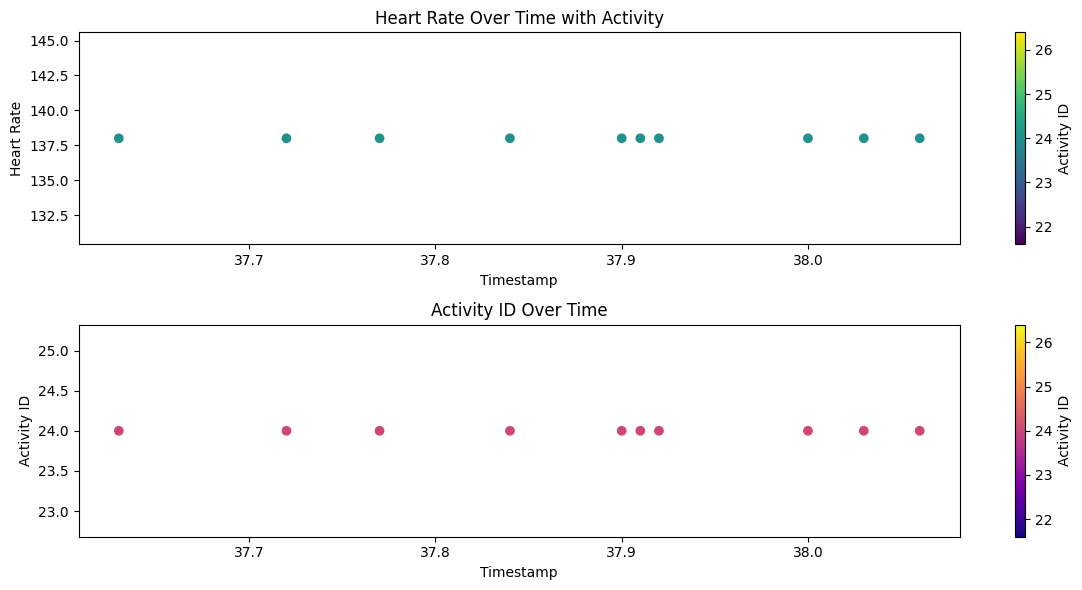


Labels from AutoGen:
['AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X', 'AutoGen label: Activity X']

Labels from LangGraph:
['LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y', 'LangGraph label: Activity Y']

Labels from LlamaIndex:
['LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z', 'LlamaIndex label: Activity Z']

Label

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import openai

# Set your OpenAI API key (for testing; in production use environment variables or a secrets manager)
#openai.api_key = "YOUR_OPENAI_API_KEY"  # Replace with your actual API key

# Updated import for the dummy agents remains the same
from langchain_ollama import OllamaLLM

# ----- Base Agent Interface -----
class BaseAgent:
    def auto_label(self, prompt: str) -> str:
        raise NotImplementedError("Subclasses must implement this method.")

# ----- Dummy Agent Implementations (as before) -----
class AutoGenAgent(BaseAgent):
    def __init__(self):
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        return "AutoGen label: Activity X"

class LangGraphAgent(BaseAgent):
    def __init__(self):
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        return "LangGraph label: Activity Y"

class LlamaIndexAgent(BaseAgent):
    def __init__(self):
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        return "LlamaIndex label: Activity Z"

class LangChainAgent(BaseAgent):
    def __init__(self):
        self.llm = OllamaLLM(model="tinyllama")
    def auto_label(self, prompt: str) -> str:
        time.sleep(0.5)
        return "LangChain label: Activity W"

# ----- New Agent Implementation Using GPT-4 via OpenAI -----
class OpenAIAgent(BaseAgent):
    def auto_label(self, prompt: str) -> str:
        try:
            # Call OpenAI ChatCompletion API using GPT-4
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=50,
                temperature=0.0
            )
            return response.choices[0].message.content.strip()
        except Exception as e:
            print("Error in OpenAIAgent:", e)
            return "Fallback label: Unknown activity"

# ----- Function to Create a Prompt from a Sliding Window -----
window_size = 5
def create_prompt(df_window):
    return (
        f"Analyze the trend in the following time-series data:\n"
        f"{df_window.to_dict(orient='records')}\n"
        "Assign a consistent label based on activity patterns. Return only the label."
    )

def label_data_with_context(idx, df, agent: BaseAgent) -> str:
    subset = df.iloc[max(0, idx - window_size): min(len(df), idx + window_size)]
    prompt = create_prompt(subset)
    try:
        label = agent.auto_label(prompt).strip()
        return label
    except Exception as e:
        print(f"Error labeling index {idx}: {e}")
        return "Dummy label"

# ----- Data Loading -----
# Set the absolute file path for your cleaned_data.csv file on Google Drive
file_path = "/content/drive/MyDrive/AIPM/cleaned_data.csv"
df = pd.read_csv(file_path)
print("Data loaded successfully. Here's a preview:")
print(df.head())

# Example: filter and sample the data
timestamp_start = 37.6
timestamp_end = 38.1
filtered_df = df[(df['timestamp'] >= timestamp_start) & (df['timestamp'] <= timestamp_end)]
sampled_df = filtered_df.sample(n=min(10, len(filtered_df)), random_state=42)

# ----- Instantiate All Agents (Including OpenAIAgent) -----
agents = {
    "AutoGen": AutoGenAgent(),
    "LangGraph": LangGraphAgent(),
    "LlamaIndex": LlamaIndexAgent(),
    "LangChain": LangChainAgent(),
    "OpenAI": OpenAIAgent()  # New agent using GPT-4
}

# ----- Apply Labeling with All Agents and Collect Results -----
results = {}
for agent_name, agent in agents.items():
    print(f"Processing labels with {agent_name}...")
    labels = [label_data_with_context(i, sampled_df, agent) for i in range(len(sampled_df))]
    results[agent_name] = labels

# Option: Add one agent's labels (e.g., OpenAI) to the DataFrame for visualization.
sampled_df["label"] = results["OpenAI"]

# ----- Visualization -----
plt.figure(figsize=(12, 6))
# Determine the correct heart rate column (assume "heart_rate" or "heartrate")
hr_col = 'heart_rate' if 'heart_rate' in sampled_df.columns else 'heartrate'

plt.subplot(2, 1, 1)
plt.scatter(sampled_df["timestamp"], sampled_df[hr_col], c=sampled_df["activityID"], cmap='viridis')
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Over Time with Activity")
plt.colorbar(label="Activity ID")

plt.subplot(2, 1, 2)
plt.scatter(sampled_df["timestamp"], sampled_df["activityID"], c=sampled_df["activityID"], cmap='plasma')
plt.xlabel("Timestamp")
plt.ylabel("Activity ID")
plt.title("Activity ID Over Time")
plt.colorbar(label="Activity ID")
plt.tight_layout()
plt.show()

# Print out the labeling results from each agent
for name, labels in results.items():
    print(f"\nLabels from {name}:")
    print(labels)

OpenAI API key loaded and set.
API Test Response: Hello! How can I assist you today?
Data loaded successfully. Here's a preview:
   timestamp  activityID  heart_rate    hand_1    hand_2    hand_3    hand_4  \
0      31.20          24         NaN -2.456255 -1.547849 -0.447012  0.459854   
1      31.21          24         NaN -2.456255 -1.549445 -0.453384  0.421375   
2      31.22          24       139.0 -2.456255 -1.553946 -0.434491  0.478935   
3      31.23          24       139.0 -2.456255 -1.559843 -0.425046  0.504459   
4      31.24          24       139.0 -2.456255 -1.565840 -0.406319  0.523500   

     hand_5    hand_6    hand_7  ...   ankle_8   ankle_9  ankle_10  ankle_11  \
0 -1.531335 -0.454720  0.434035  ... -0.066828 -0.048846 -0.136917 -0.805473   
1 -1.542180 -0.447283  0.465369  ... -0.127247 -0.020308  0.031372 -0.751382   
2 -1.550492 -0.448481  0.483675  ... -0.170201  0.045939  0.217533 -0.844931   
3 -1.552860 -0.437380  0.509757  ... -0.147196  0.101257  0.327859 -0.

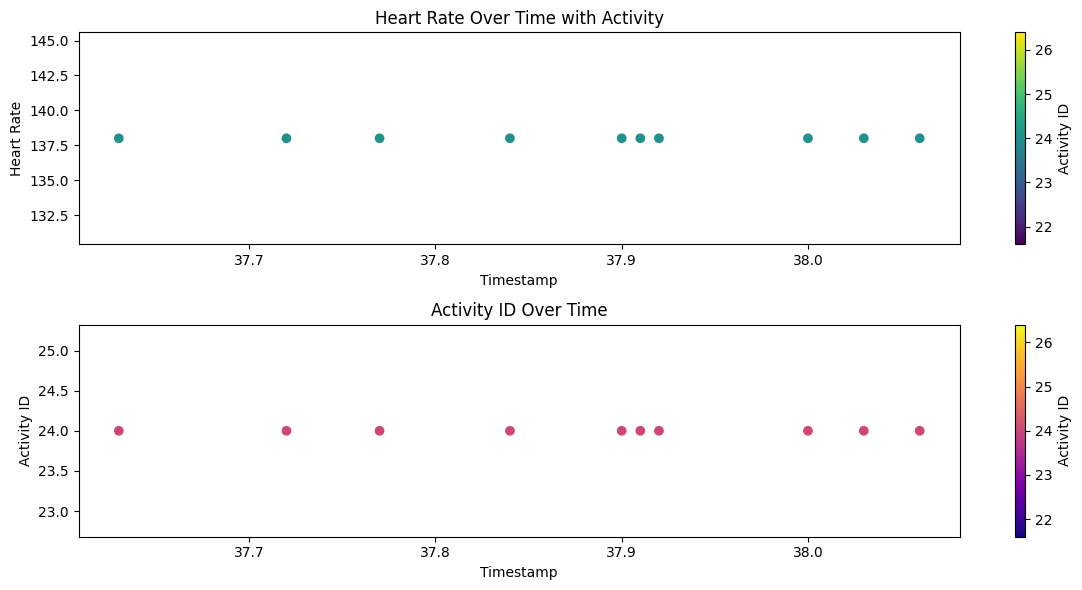


Labels from AutoGen:
['The data provided represents a single activity with the ID 24, which is repeated across all data points. The heart rate remains constant at 138.0 across all data points. The data points for the hands, chest, and ankles show variations,', 'The data provided represents a series of sensor readings from different parts of the body (hands, chest, and ankles) over time, during a specific activity (activityID: 24). The heart rate remains constant at 138.0 throughout the data', 'Fallback label: Unknown activity', 'Fallback label: Unknown activity', 'Fallback label: Unknown activity', 'Fallback label: Unknown activity', 'Fallback label: Unknown activity', 'Fallback label: Unknown activity', 'Fallback label: Unknown activity', 'Fallback label: Unknown activity']

Labels from LangGraph:
["The data provided seems to be related to a physical activity monitoring system, where different sensors are placed on the hands, chest, and ankles of a person. The 'activityID' field indi

In [ ]:
import openai
# Set the file path to your key file (ensure it's a plain text file)
key_file_path = "/content/drive/MyDrive/AIPM/openai_key.txt"
with open(key_file_path, "r") as f:
    api_key = f.read().strip()
openai.api_key = api_key
print("OpenAI API key loaded and set.")

# Test the API key with a simple GPT-4 request
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Hello, world!"}],
    max_tokens=50
)
print("API Test Response:", response.choices[0].message.content)

# -------------------------------
# Step 1: Define the Base Agent and Four Agent Implementations Using GPT-4
# -------------------------------
import time

class GPT4AgentBase:
    def auto_label(self, prompt: str) -> str:
        """
        Uses GPT-4 via OpenAI's ChatCompletion API to generate a label for the given prompt.
        """
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=50,
                temperature=0.0
            )
            return response.choices[0].message.content.strip()
        except Exception as e:
            print("Error in GPT4AgentBase:", e)
            return "Fallback label: Unknown activity"

class AutoGenAgent(GPT4AgentBase):
    def auto_label(self, prompt: str) -> str:
        modified_prompt = "AutoGen Approach: " + prompt
        return super().auto_label(modified_prompt)

class LangGraphAgent(GPT4AgentBase):
    def auto_label(self, prompt: str) -> str:
        modified_prompt = "LangGraph Approach: " + prompt
        return super().auto_label(modified_prompt)

class LlamaIndexAgent(GPT4AgentBase):
    def auto_label(self, prompt: str) -> str:
        modified_prompt = "LlamaIndex Approach: " + prompt
        return super().auto_label(modified_prompt)

class LangChainAgent(GPT4AgentBase):
    def auto_label(self, prompt: str) -> str:
        modified_prompt = "LangChain Approach: " + prompt
        return super().auto_label(modified_prompt)

# -------------------------------
# Step 2: Helper Functions for Prompt Creation and Labeling with Context
# -------------------------------
window_size = 5
def create_prompt(df_window):
    """
    Create a prompt from a sliding window of data.
    """
    return (
        f"Analyze the trend in the following time-series data:\n"
        f"{df_window.to_dict(orient='records')}\n"
        "Assign a consistent label based on activity patterns. Return only the label."
    )

def label_data_with_context(idx, df, agent: GPT4AgentBase) -> str:
    """
    Uses a sliding window of rows from the DataFrame to create a prompt and generates a label using the given agent.
    """
    subset = df.iloc[max(0, idx - window_size): min(len(df), idx + window_size)]
    prompt = create_prompt(subset)
    try:
        label = agent.auto_label(prompt).strip()
        return label
    except Exception as e:
        print(f"Error labeling index {idx}: {e}")
        return "Dummy label"

# -------------------------------
# Step 3: Data Loading and Sampling from Cleaned Data on Google Drive
# -------------------------------
# Set the absolute file path to your cleaned_data.csv file on Google Drive
data_file_path = "/content/drive/MyDrive/AIPM/cleaned_data.csv"
df = pd.read_csv(data_file_path)
print("Data loaded successfully. Here's a preview:")
print(df.head())

# Example: Filter data by a timestamp range and sample a subset
timestamp_start = 37.6
timestamp_end = 38.1
filtered_df = df[(df['timestamp'] >= timestamp_start) & (df['timestamp'] <= timestamp_end)]
sampled_df = filtered_df.sample(n=min(10, len(filtered_df)), random_state=42)

# -------------------------------
# Step 4: Instantiate All Four Agents and Run Labeling
# -------------------------------
agents = {
    "AutoGen": AutoGenAgent(),
    "LangGraph": LangGraphAgent(),
    "LlamaIndex": LlamaIndexAgent(),
    "LangChain": LangChainAgent()
}

results = {}
for agent_name, agent in agents.items():
    print(f"Processing labels with {agent_name}...")
    labels = [label_data_with_context(i, sampled_df, agent) for i in range(len(sampled_df))]
    results[agent_name] = labels

# For visualization, we add one agent's labels (e.g., from LangChain) to the DataFrame
sampled_df["label"] = results["LangChain"]

# -------------------------------
# Step 5: Visualization of the Data with Labels
# -------------------------------
plt.figure(figsize=(12, 6))
# Determine the correct heart rate column: check for 'heart_rate' or fallback to 'heartrate'
hr_col = 'heart_rate' if 'heart_rate' in sampled_df.columns else 'heartrate'

plt.subplot(2, 1, 1)
plt.scatter(sampled_df["timestamp"], sampled_df[hr_col], c=sampled_df["activityID"], cmap='viridis')
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Over Time with Activity")
plt.colorbar(label="Activity ID")

plt.subplot(2, 1, 2)
plt.scatter(sampled_df["timestamp"], sampled_df["activityID"], c=sampled_df["activityID"], cmap='plasma')
plt.xlabel("Timestamp")
plt.ylabel("Activity ID")
plt.title("Activity ID Over Time")
plt.colorbar(label="Activity ID")

plt.tight_layout()
plt.show()

# Print out the labeling results from each agent for comparison
for name, labels in results.items():
    print(f"\nLabels from {name}:")
    print(labels)